In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table

In [34]:
t = Table.read('TGAS_d125_Wright03_2Mass', format='votable')
print(t.colnames)


Source = t["Source"]
Gmag = t["__Gmag_"]
Vmag = t["VTmag"]
Jmag = t["Jmag"]
Hmag = t["Hmag"]
Kmag = t["Kmag"]
Qfl = t["Qfl"]
DistW = t["Dist"]
d1 = t["d_arcsec"]
d2 = t["d_arcsec_2"]
Dup = t["Dup"]

#Remove Wright et Al sources > 4"
for i in range(0, len(DistW)):
    if(DistW[i] > 4.0):
        row = t[i]
        cols = row._table.columns.values()
        for col in cols:
            col.mask[i] = True
for i in range(0, len(DistW)):
    if (DistW[i] > 4.0):
        print(i,DistW[i])
test = DistW.compressed()

#Remove Duplicate Matches
for c in range(0, len(Dup)):
    if(Dup.mask[c] ==False):
        if(Dup[c] > 0.5):
            row = t[c]
            cols = row._table.columns.values()
            for dupcol in cols:
                dupcol.mask[c] = True
test = Dup.compressed()
print(len(test))

print(len(Dup))
print(len(DistW))

print(t['Dup'])

for x in range(0,len(Qfl)):
    if(Source.mask[i] ==False):
        if(Qfl[i][0] == ord("A")):
            Jmag.mask[i] = False
        else:
            Jmag.mask[i] = True
        if(Qfl[i][1] == ord("A")):
            Hmag.mask[i] = False
        else:
            Hmag.mask[i] = True
        if(Qfl[i][2] == ord("A")):
            Kmag.mask[i] = False
        else:
            Kmag.mask[i] = True

print("Sources: ", len(Jmag))



['d_arcsec', '_2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000_2', 'DEJ2000_2', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']
21116
31437
31437
Dup
---
  0
  0
  0
  0
 --
  0
 --
  0
  0
 --
...
  0
 --
  0
 --
 --
  0
 --
  0
  0
  0
 --
Length = 31437 rows
Sources:  31437


In [41]:
Test = Source.compressed()
unique = set()
Gdups = set()

for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("GAIA Duplicate Source: ",Test[i])
        Gdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished GAIA Duplicate Check. Found: ", len(Gdups))

for i in range(0,len(Source)):
    if(Source.mask[i] == False):
        Name = Source[i]
        if(Name in Gdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all GAIA duplicates. All sources involved")
TwoM = t["_2MASS"]
unique = set()
Tdups = set()
Test = TwoM.compressed()
for i in range(0,len(Test)):
    if(Test[i] in unique):
        print("2MASS Duplicate Source: ",Test[i])
        Tdups.add(Test[i])
    else:
        unique.add(Test[i])
print("Finished 2MASS Duplicate Check. Found: ", len(Tdups))

for i in range(0,len(TwoM)):
    if(Source.mask[i] == False):
        Name = TwoM[i]
        if(Name in Tdups):
            row = t[i]
            idx = row._index
            cols = row._table.columns.values()
            for col in cols:
                col.mask[i] = True
print("Finished masking all 2MASS duplicates. All sources involved")
Test = Source.compressed()
print("Remaining valid sources: ",len(Test))

GAIA Duplicate Source:  6884135278959050496
GAIA Duplicate Source:  2599477381936924288
GAIA Duplicate Source:  558645434120034432
GAIA Duplicate Source:  1660787987061293184
GAIA Duplicate Source:  2601823258714060928
GAIA Duplicate Source:  6888991306421381376
GAIA Duplicate Source:  2603934664637217536
GAIA Duplicate Source:  2606220068274576512
GAIA Duplicate Source:  5817220734974918528
GAIA Duplicate Source:  3752121500375725568
GAIA Duplicate Source:  6901583257180902656
GAIA Duplicate Source:  6906039921406723328
GAIA Duplicate Source:  3762934853637792128
GAIA Duplicate Source:  3766122578366260608
GAIA Duplicate Source:  3768948769924888448
GAIA Duplicate Source:  1678522250623852032
GAIA Duplicate Source:  1682894286812838400
GAIA Duplicate Source:  2559714849589105664
GAIA Duplicate Source:  5778428315476701696
GAIA Duplicate Source:  6845257406793744640
GAIA Duplicate Source:  4775347911905128064
GAIA Duplicate Source:  5791140078642665984
GAIA Duplicate Source:  478509649

GAIA Duplicate Source:  1161508552981420160
GAIA Duplicate Source:  6355336878249966592
GAIA Duplicate Source:  114051963192311808
GAIA Duplicate Source:  1167718044899706368
GAIA Duplicate Source:  3211128588003080448
GAIA Duplicate Source:  6368752019620393984
GAIA Duplicate Source:  2167838116494731648
GAIA Duplicate Source:  4381906883001238784
GAIA Duplicate Source:  2170108951599806976
GAIA Duplicate Source:  3227473859141798528
GAIA Duplicate Source:  4388903144206123264
GAIA Duplicate Source:  136467844187586816
GAIA Duplicate Source:  1200046091936992640
GAIA Duplicate Source:  6383645935410374144
GAIA Duplicate Source:  1202735840975914112
GAIA Duplicate Source:  4392970203357519360
GAIA Duplicate Source:  6663264970853296512
GAIA Duplicate Source:  6664924546216251392
GAIA Duplicate Source:  4644082510065265536
GAIA Duplicate Source:  4646568162257815808
GAIA Duplicate Source:  2410277681636721536
GAIA Duplicate Source:  3525719583631612800
GAIA Duplicate Source:  5621987670

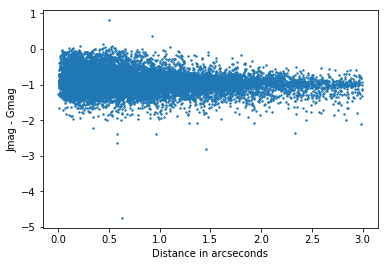

-0.9115818573
0.251685026387


In [46]:
JmG = Jmag - Gmag
plt.scatter(d1,JmG,s=2.0)
plt.xlabel("Distance in arcseconds")
plt.ylabel("Jmag - Gmag")
plt.show()
print(np.mean(JmG))
print(np.std(JmG))


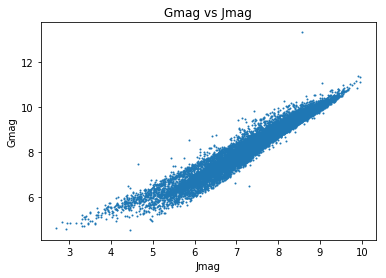

In [49]:
plt.title("Gmag vs Jmag")
plt.scatter(Jmag,Gmag,s=1.0)
plt.xlabel("Jmag")
plt.ylabel("Gmag")
plt.show()
